# Série 09 - Exercices - Solutions

Le but de cette série est de se familiariser avec le  module `numpy.random` pour la génération de nombres aléatoires et son application pour les calculs de propagation d'incertitude.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exercice 1**  - Echantillonner des données

Utiliser la fonction `random.choice` de `numpy` pour tirer 5 valeurs aléatoire avec remise dans le vecteur `data`

In [2]:
data = [1.2, 4., 5.2, 7.3, 8.9, 10.2]

np.random.seed(11029)
np.random.choice(data, 5, replace=True)

array([5.2, 7.3, 5.2, 7.3, 7.3])

**Exercice 2** - Loi de Bernoulli

Soit une variable aléatoire $X$, suivant une loi de Bernoulli :
- prend la valeur 1 avec la probabilité $p$
- prend la valeur 0 avec la probabilité $1-p$

Tirer 15 valeurs aléatoires dans une loi de Bernoulli de probabilité $p=0.35$.

In [3]:
proba = 0.35
np.random.choice([1, 0], 15, p=[proba, 1-proba] )

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

**Exercice 3** - Loi Binomiale

Soit une population de 153 individus. Le taux de mortalité est de 0.024.

Faire un tirage aléatoire dans une loi binomiale pour simuler le nombre d'individus qui décèdent.

In [4]:
n = 153
proba = 0.024
np.random.binomial(n, proba)

5

**Exercice 4** - Loi uniforme

Tirer 60 valeurs dans une loi uniforme entre $\pi$ et $2\pi$. En faire l'histogramme.

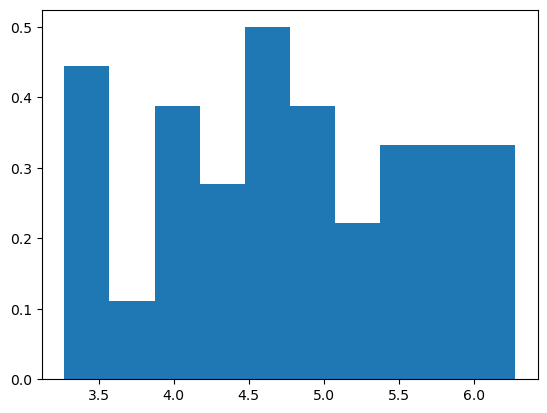

In [5]:
ech_uniform = np.random.uniform( np.pi, 2*np.pi , 60)
plt.hist(ech_uniform, density=True);

**Exercice 5** - Loi normale

Tirer 2'000 valeurs dans une loi gaussienne de moyenne 3.2 et d'écart-type 0.5. Calculer la moyenne et l'écart-type des valeurs tirées pour vérifier que votre tirage est correct.

In [6]:
ech_normal = np.random.normal(3.2, 0.5, 2000)
np.mean(ech_normal)
np.std(ech_normal)

0.5100783368099979

**Exercice 6** - Propagation d'incertitude

Le débit d'eau $Q$ [m$^3$/s]qui traverse une section d'aquifère est égal à :

$$Q = A \times K  \times \frac{h_1-h_0}{L}$$

avec:
- $A$ [m$^2$] l'aire traversée par l'écoulement
- $K$ [m/s] la conductivité hydraulique
- $h_1$ et $h_0$ [m] la charge hydraulique en amont et en aval le long d'une ligne de courant perpendiculaire à la section traversée
- $L$ [m] la distance entre les deux points de mesures

On a mesuré la conductivité hydraulique $K$ sur plusieurs échantillons, ainsi que les facteurs géométriques.

On a obtenu les valeurs suivante avec leur incertitudes

- $A = 500 \pm 5 [m^2]$
- $Y = \ln K = -3 \pm 0.4 [\ln (m/s)] $ 
- $h_1 = 7m \pm 0.2$
- $h_0 = 0 [m]$ 
- $L = 1000 [m]$

Déterminer la valeur moyenne de $Q$ et son intervalle de confiance à 95%. 

On supposera que toutes les incertitudes ci-dessus sont données avec un intervalle de confiance à 95% et que les erreurs sont gaussiennes autour de la valeur centrale donnée.

Arrondissez les valeurs pour avoir des chiffres significatifs raisonnables.

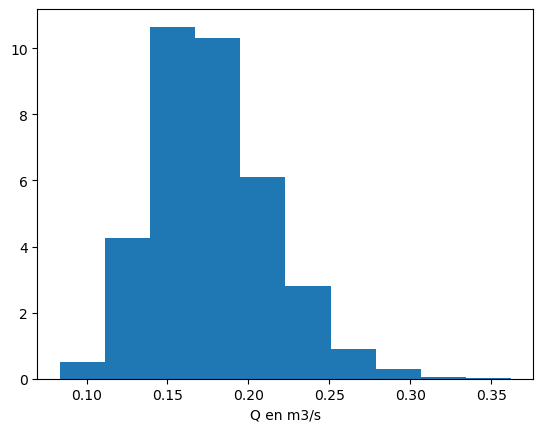

Débit estimée 0.17749129190459365 m3/s
Intervalle de confiance à 95% 0.11791195170739503 - 0.2580857985848611 m3/s


In [7]:
nsimuls = 10000

# Paramètres du problème
A = np.random.normal(500,2.5,nsimuls)
Y = np.random.normal(-3,.2,nsimuls)
K = np.exp(Y)
h1 = np.random.normal(7,.1,nsimuls)
h0 = 0
L = 1000

# Application du calcul
Q = A * K * (h1 - h0) / L

plt.hist(Q, density = True)
plt.xlabel('Q en m3/s')
plt.show()

print("Débit estimée", np.mean(Q),'m3/s')
print("Intervalle de confiance à 95%", np.percentile(Q,2.5),'-',np.percentile(Q,97.5),'m3/s')

Au final on trouve que le **débit est de l'ordre de 0.18 m/s est qu'il est compris (intervalle de confiance à 95%) entre 0.12 et 0.26 m3/s.**

**Exercice 7 - Coexistence de deux espèces** 

L'une des questions écologiques les plus anciennes et non encore résolues concerne la coexistence de plusieurs espèces. Pour illustrer le problème, vous allez créer un modèle très simple de deux espèces concurrentes. 

Supposons qu'un écosystème  soit occupé par $𝑁$ individus appartenant à deux espèces. Au début de la simulation, la moitié de ces individus appartient à l'espèce 1 tandis que l'autre moitié appartient à l'espèce 2.

On note $𝑁_1( t )$ le nombre d'individus de l'espèce 1 à l'instant $t$ et $𝑁_2( t )$ le nombre d'individus de l'espèce 2 à l'instant $t$.

Nous supposons de plus que ces deux espèces ont le même taux de mortalité et qu'une fois qu'un individu meurt, l'espace qu'il occupait est pris par un nouvel individu de l'espèce 1 avec une probabilité qui dépend de la proportion d'individus au temps considéré $P = \frac{N_1( t)}{N}$ et par l'espèce 2 avec la probabilité $1-P$.

Comme la simulation commence avec le même nombre d'individus pour chaque espèce et que ces espèces ont des taux démographiques identiques, on pourrait s'attendre à ce que la coexistence soit garantie. Le but de ce lab est de vérifier si cette hypothèse est correcte.


**Partie 1 - Implémentation d'une simulation**

Ecrire une fonction qui prennent en entrée la taille de la population initiale $N$, le nombre d'annéee (= nombre de pas de temps) que l'on souhaite simuler, et le taux de mortalité. La fonction renvoie les deux vecteurs  $N_1$ et $N_2$ contenant le nombre d'individus de chacune des populations 1 et 2 simulées pour chaque pas de temps.

Comme l'évolution de la population dépend de phénomènes aléatoires (quantité d'individus de chaque espèce qui décèdent, et processus de remplacement des espaces libérés), la fonction doit être aléatoire et doit renvoyer pour chaque appel une simulation stochastique différente qui respecte les probabilités décrites dans l'énoncé.

**Pseudo-code**

 Le programme que vous allez écrire pourrait s'organiser suivant le pseudo-code suivant :

- 1) Créer les vecteurs $N_1$ et $N_2$ pour stocker l'évolution du nombre d'individus
- 2) Initialiser la population de chaque espèce de manière équilibrée $𝑁_1(t=0) = N/2$, et $𝑁_2(t=0)=N/2$  
- 3) Faire une boucle, pour chaque année : 
    - A) simuler le nombre d'individus qui meurent de chaque espèce (tirage aléatoire suivant la probabilité adaptée)
    - B) simuler quelles espèces occuperont chacun des espaces vacants et mettre à jour la population
- 4) Retourner les deux vecteurs $N_1$ et $N_2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def simul_populations(N,nsteps,mortality):
        
    N1 = np.zeros(nsteps)
    N2 = np.zeros(nsteps)
    
    N1[0] = N/2
    N2[0] = N/2

    for i in range(1,nsteps):

        dead1 = np.random.binomial(N1[i-1], mortality)
        dead2 = np.random.binomial(N2[i-1], mortality)

        deads = dead1 + dead2

        new1 = np.random.binomial(deads, N1[i-1]/N)
        new2 = deads - new1

        N1[i] = N1[i-1] - dead1 + new1
        N2[i] = N2[i-1] - dead2 + new2   

    return N1, N2

### Utilisation de la fonction

- Utiliser votre fonction pour calculer l'évolution d'une population contenant 10'000 individus au total, sur une période de 30'000 ans. Le taux de mortalité est de 0.35.
- Faire un graphe montrant l'évolution des deux populations en fonction du temps. 
- Répétez le calcul en exécutant plusieurs fois la cellule du notebook pour vérifier que la fonction donne bien un résultat stochastique.
- Commentez le résultat.

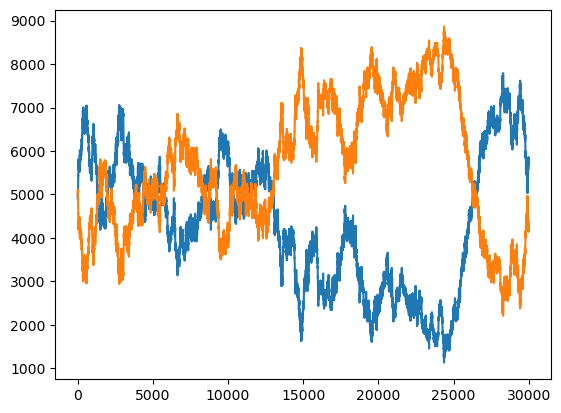

In [12]:
N = 10000
nsteps = 30000
mortality = 0.35

N1, N2 = simul_populations(N,nsteps,mortality)

plt.plot(N1)
plt.plot(N2)
plt.show()

**Commentaires** 

On constate que suivant les simulations plusieurs cas sont possibles. Soit l'une ou l'autre des espèces disparait et l'autre envahie tout l'écosystème, soit on a des fluctuations autour de l'équilibre. 

Des oscilations aparaissent et il n'est pas évident de savoir quelle espèce va dominer en regardant l'évolution pendant les premières années.

## Partie 2 - Analyse statistique des résultats

Pour se faire une meilleure idée du comportement global de ce système, nous allons répéter l'expérience de nombreuses fois et estimer la proportion de cas où l'une des espèces disparait et les cas où les deux espèces continuent de cohabiter à la fin des 30'000 ans.

Pour cela, répétez la simulation de nombreuses fois (une dizaine, ou centaine de fois ou plus). Pour chaque simulation stockez uniquement dans un tableau un code vous permettant de savoir si à la fin de la simulation on est dans une situation d'équilibre ou si une espèce à disparu.

Analysez ensuite votre tableau pour calculer la probabilité d'obtenir un équilibre ou au contraire dans une situation où l'une des deux espèces disparait.

Quelles sont ces probabilités ? Faites un graphe représentant ces probabilités ? 

Commentez votre résultat. Quel mécanisme faudrait-il ajouter dans le système naturel pour favoriser la co-existence ?

In [15]:
ns = 100
f = np.zeros((ns, 1))

print("Merci d'être patient, je simule... :-)")
for k in range(ns):
    
    print(f"simul #-{k},", end='')
    N1, N2 = simul_populations(N, nsteps, mortality)
    if N1[-1] * N2[-1] == 0:
        f[k] = 1
        
print("Voila, c'est fini !")

Merci d'être patient, je simule... :-)
simul #-0,simul #-1,simul #-2,simul #-3,simul #-4,simul #-5,simul #-6,simul #-7,simul #-8,simul #-9,simul #-10,simul #-11,simul #-12,simul #-13,simul #-14,simul #-15,simul #-16,simul #-17,simul #-18,simul #-19,simul #-20,simul #-21,simul #-22,simul #-23,simul #-24,simul #-25,simul #-26,simul #-27,simul #-28,simul #-29,simul #-30,simul #-31,simul #-32,simul #-33,simul #-34,simul #-35,simul #-36,simul #-37,simul #-38,simul #-39,simul #-40,simul #-41,simul #-42,simul #-43,simul #-44,simul #-45,simul #-46,simul #-47,simul #-48,simul #-49,simul #-50,simul #-51,simul #-52,simul #-53,simul #-54,simul #-55,simul #-56,simul #-57,simul #-58,simul #-59,simul #-60,simul #-61,simul #-62,simul #-63,simul #-64,simul #-65,simul #-66,simul #-67,simul #-68,simul #-69,simul #-70,simul #-71,simul #-72,simul #-73,simul #-74,simul #-75,simul #-76,simul #-77,simul #-78,simul #-79,simul #-80,simul #-81,simul #-82,simul #-83,simul #-84,simul #-85,simul #-86,simul #-87,sim

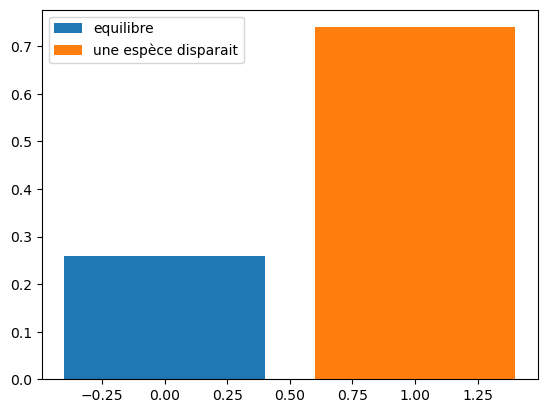

In [16]:
proba_disparition = np.sum(f)/ns
proba_equilibrium = 1 - proba_disparition 
plt.bar(0,proba_equilibrium,label="equilibre")
plt.bar(1,proba_disparition,label="une espèce disparait")
plt.legend()
plt.show()